<a href="https://colab.research.google.com/github/Shivangi0409/RakshaDrishti/blob/main/Finalesttttttt_objdetect_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00


In [3]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 113.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4thPzLgF1QFDIQ7JsUTA")
project = rf.workspace("hello-rcwya").project("weapon-detection-pgqnr-nc3pd")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weapon-Detection-1 in yolov8:: 100%|██████████| 36280/36280 [00:07<00:00, 4961.37it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
from ultralytics import YOLO
# Using YOLOv8n pre-trained model (nano)
model = YOLO("yolov8m.pt")

In [7]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Weapon-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

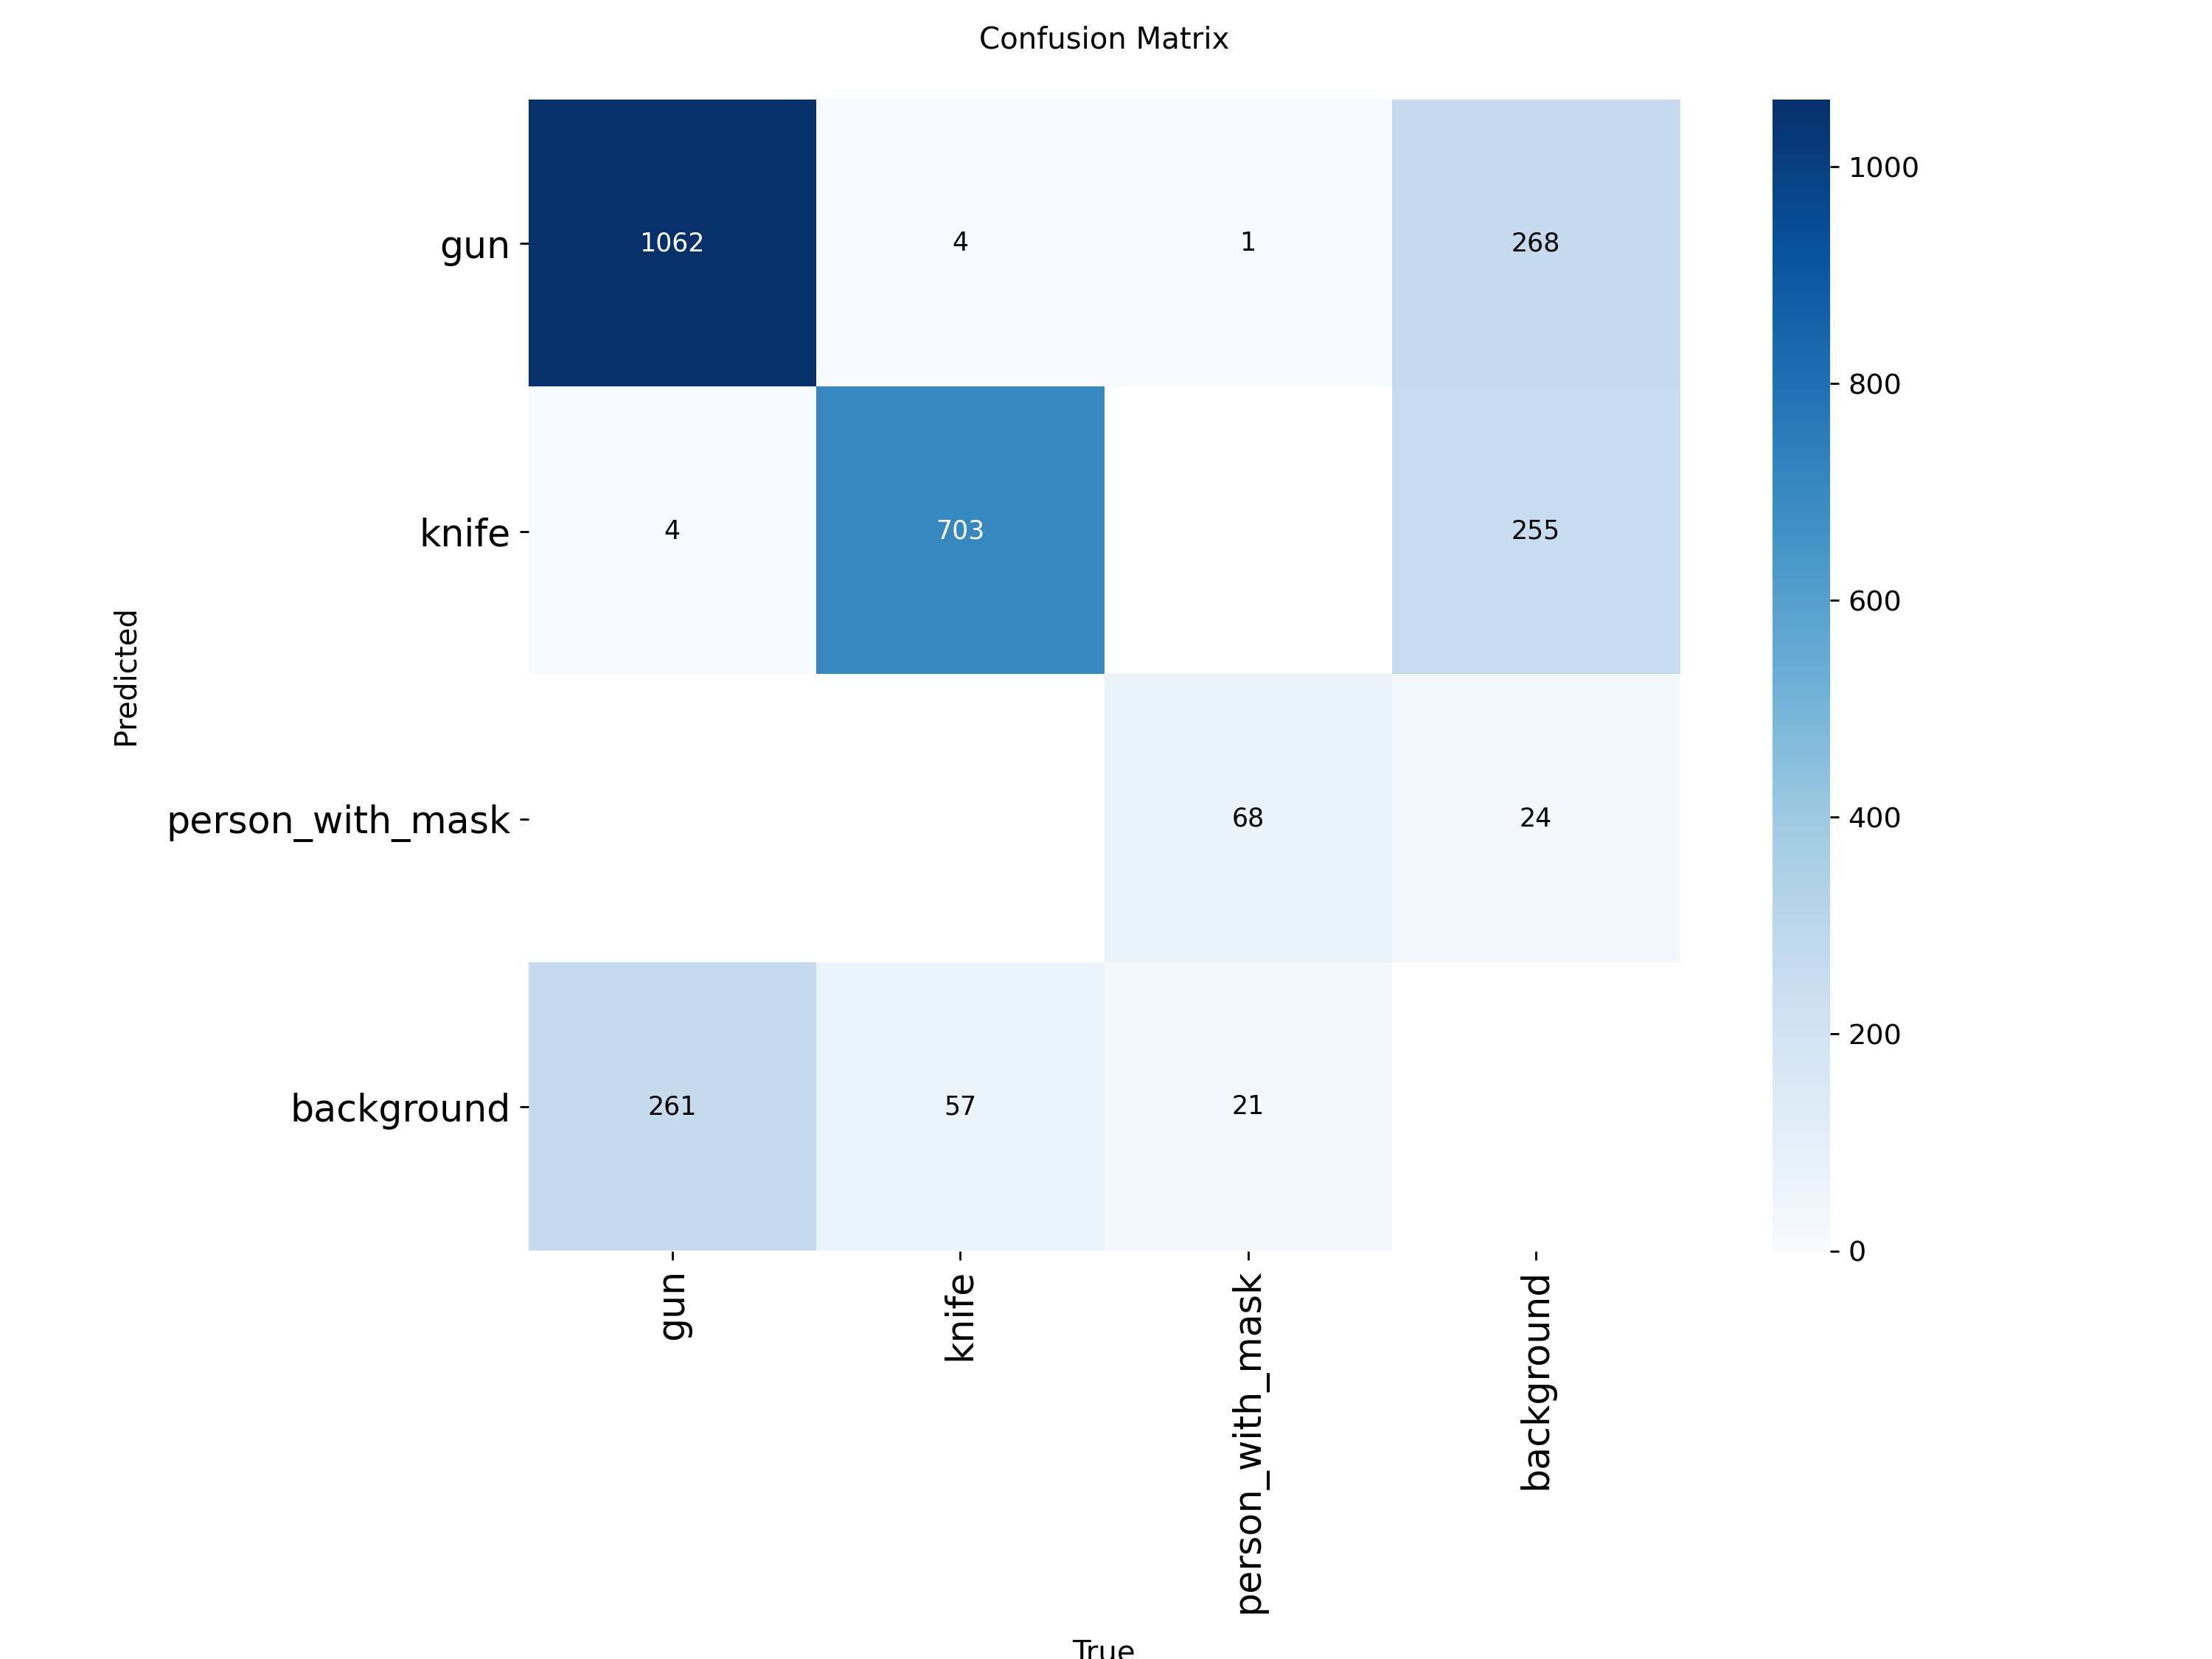

In [9]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

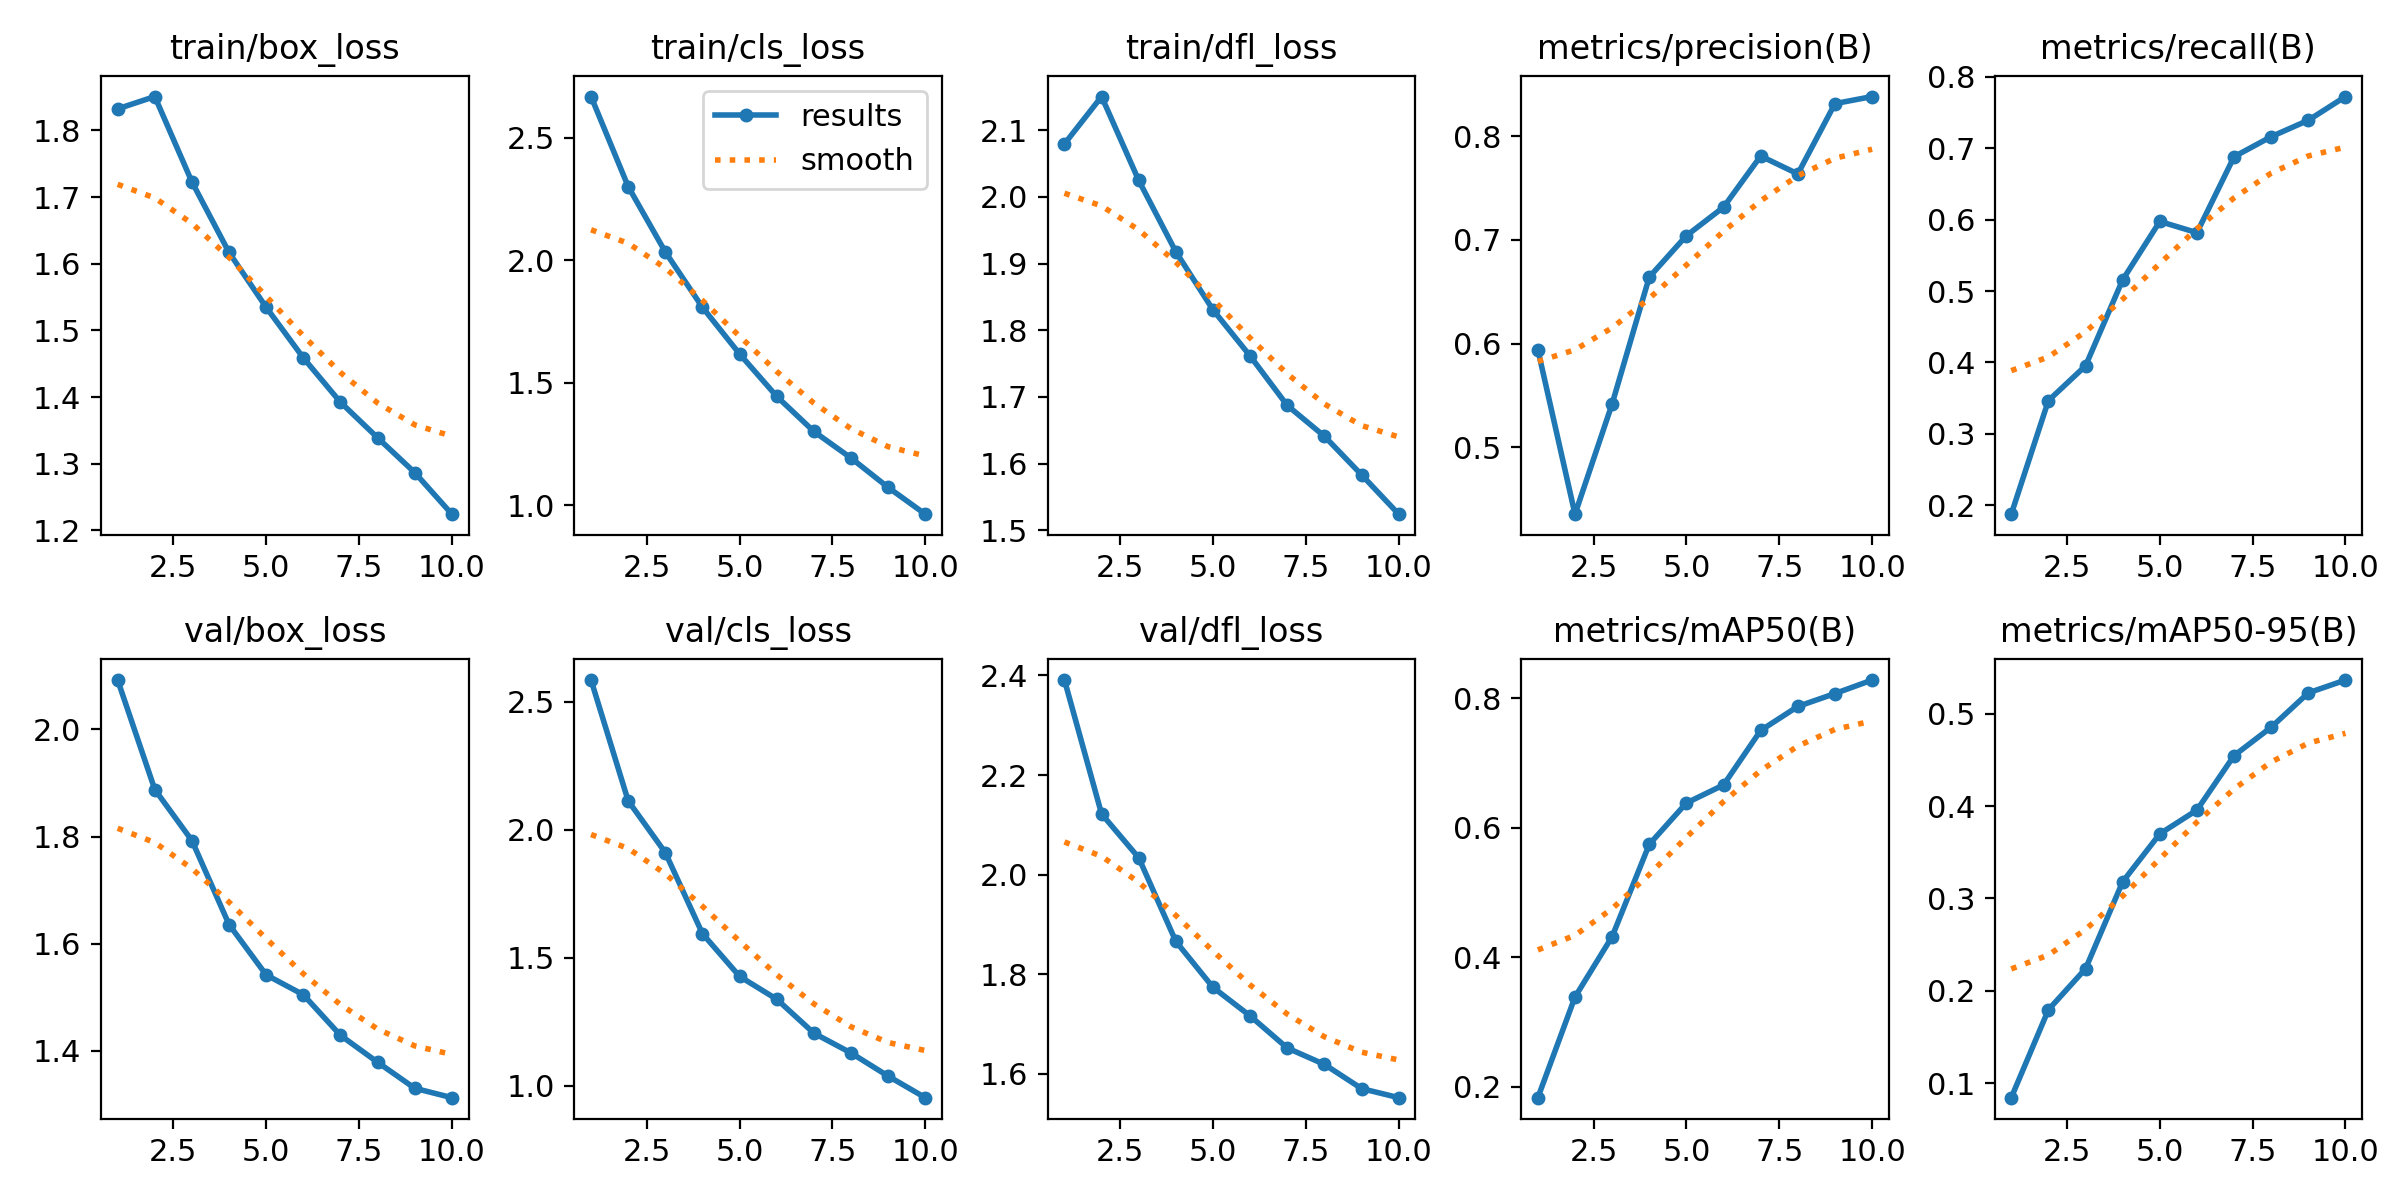

In [11]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [13]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1821.8±451.3 MB/s, size: 40.2 KB)
val: Scanning /content/Weapon-Detection-1/valid/labels.cache... 1997 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1997/1997 24.1Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 2181. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 125/125 2.6it/s 47.4s
                   all       1997       2181      0.837      0.773      0.827      0.537
                   gun       1174       1327      0.878      0.742      0.833      0.546
                 knife    

In [17]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/973 /content/Weapon-Detection-1/test/images/-Video-00-00-06-033-_jpg.rf.fbdf29428db6f3c9a5f491ca63d4c402.jpg: 640x640 (no detections), 37.0ms
image 2/973 /content/Weapon-Detection-1/test/images/-Video-00-00-06-333-_jpg.rf.58be033b41b507bed8fee76ef111340e.jpg: 640x640 1 gun, 37.0ms
image 3/973 /content/Weapon-Detection-1/test/images/-_-_-6-01_mp4-86_jpg.rf.4412916181442188fb06af8c2f4b48a6.jpg: 640x640 (no detections), 37.0ms
image 4/973 /content/Weapon-Detection-1/test/images/-_-_-6-03_mp4-128_jpg.rf.b1754cc30d21a5c9c7d19dfa13d6c54d.jpg: 640x640 (no detections), 37.0ms
image 5/973 /content/Weapon-Detection-1/test/images/00000013_jpg.rf.68536643b89afc33e0e884fad4b64a03.jpg: 640x640 1 person_with_mask, 37.0ms
image 6/973 /content/Weapon-Detection-1/test/images/00041_png_jpg.rf.615e3e91715d2e0ea5c016488d11f973.jpg: 640

In [19]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Evaluate on validation/test dataset
metrics = model.val(data="/content/Weapon-Detection-1/data.yaml")  # path to your data.yaml
print(metrics)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1286.9±535.3 MB/s, size: 45.6 KB)
val: Scanning /content/Weapon-Detection-1/valid/labels.cache... 1997 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1997/1997 3.0Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 2181. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 125/125 2.5it/s 50.0s
                   all       1997       2181      0.837      0.773      0.827      0.537
                   gun       1174       1327      0.878      0.742      0.833      0.546
                 knife     